# Forecasting Fuel Economy

#### target variable: Combined MPG (FT 1)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

pd.set_option('max_columns', None)
%matplotlib inline

In [2]:
fuel_eco = pd.read_csv("C:\\Users\\Alejandro\\Documents\\GitHub\\GA-Data-Science-Final-Project\\database.csv")
fuel_eco.head()

C:\Users\Alejandro\Anaconda3.5\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (7,16,62,64,65,67,68,78) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Vehicle ID,Year,Make,Model,Class,Drive,Transmission,Transmission Descriptor,Engine Index,Engine Descriptor,Engine Cylinders,Engine Displacement,Turbocharger,Supercharger,Fuel Type,Fuel Type 1,Fuel Type 2,City MPG (FT1),Unrounded City MPG (FT1),City MPG (FT2),Unrounded City MPG (FT2),City Gasoline Consumption (CD),City Electricity Consumption,City Utility Factor,Highway MPG (FT1),Unrounded Highway MPG (FT1),Highway MPG (FT2),Unrounded Highway MPG (FT2),Highway Gasoline Consumption (CD),Highway Electricity Consumption,Highway Utility Factor,Unadjusted City MPG (FT1),Unadjusted Highway MPG (FT1),Unadjusted City MPG (FT2),Unadjusted Highway MPG (FT2),Combined MPG (FT1),Unrounded Combined MPG (FT1),Combined MPG (FT2),Unrounded Combined MPG (FT2),Combined Electricity Consumption,Combined Gasoline Consumption (CD),Combined Utility Factor,Annual Fuel Cost (FT1),Annual Fuel Cost (FT2),Gas Guzzler Tax,Save or Spend (5 Year),Annual Consumption in Barrels (FT1),Annual Consumption in Barrels (FT2),Tailpipe CO2 (FT1),Tailpipe CO2 in Grams/Mile (FT1),Tailpipe CO2 (FT2),Tailpipe CO2 in Grams/Mile (FT2),Fuel Economy Score,GHG Score,GHG Score (Alt Fuel),My MPG Data,2D Passenger Volume,2D Luggage Volume,4D Passenger Volume,4D Luggage Volume,Hatchback Passenger Volume,Hatchback Luggage Volume,Start Stop Technology,Alternative Fuel/Technology,Electric Motor,Manufacturer Code,Gasoline/Electricity Blended (CD),Vehicle Charger,Alternate Charger,Hours to Charge (120V),Hours to Charge (240V),Hours to Charge (AC 240V),Composite City MPG,Composite Highway MPG,Composite Combined MPG,Range (FT1),City Range (FT1),Highway Range (FT1),Range (FT2),City Range (FT2),Highway Range (FT2)
0,26587,1984,Alfa Romeo,GT V6 2.5,Minicompact Cars,NaN,Manual 5-Speed,NaN,9001,(FFS),6.0,2.5,NaN,NaN,Regular,Regular Gasoline,NaN,17,0.0,0,0.0,0.0,0.0,0.0,24,0.0,0,0.0,0.0,0.0,0.0,21.0,34.0,0.0,0.0,20,0.0,0,0.0,0.0,0.0,0.0,1750,0,NaN,-2000,16.480500,0.0,-1,444.350000,-1,0.0,-1,-1,-1,N,74,7,0,0,0,0,NaN,NaN,NaN,NaN,False,NaN,NaN,0,0.0,0.0,0,0,0,0,0.0,0.0,NaN,0.0,0.0
1,27705,1984,Alfa Romeo,GT V6 2.5,Minicompact Cars,NaN,Manual 5-Speed,NaN,9005,(FFS) CA model,6.0,2.5,NaN,NaN,Regular,Regular Gasoline,NaN,17,0.0,0,0.0,0.0,0.0,0.0,24,0.0,0,0.0,0.0,0.0,0.0,21.0,34.0,0.0,0.0,20,0.0,0,0.0,0.0,0.0,0.0,1750,0,NaN,-2000,16.480500,0.0,-1,444.350000,-1,0.0,-1,-1,-1,N,74,7,0,0,0,0,NaN,NaN,NaN,NaN,False,NaN,NaN,0,0.0,0.0,0,0,0,0,0.0,0.0,NaN,0.0,0.0
2,26561,1984,Alfa Romeo,Spider Veloce 2000,Two Seaters,NaN,Manual 5-Speed,NaN,9002,(FFS),4.0,2.0,NaN,NaN,Regular,Regular Gasoline,NaN,18,0.0,0,0.0,0.0,0.0,0.0,25,0.0,0,0.0,0.0,0.0,0.0,23.0,35.0,0.0,0.0,21,0.0,0,0.0,0.0,0.0,0.0,1650,0,NaN,-1500,15.695714,0.0,-1,423.190476,-1,0.0,-1,-1,-1,N,0,0,0,0,0,0,NaN,NaN,NaN,NaN,False,NaN,NaN,0,0.0,0.0,0,0,0,0,0.0,0.0,NaN,0.0,0.0
3,27681,1984,Alfa Romeo,Spider Veloce 2000,Two Seaters,NaN,Manual 5-Speed,NaN,9006,(FFS) CA model,4.0,2.0,NaN,NaN,Regular,Regular Gasoline,NaN,18,0.0,0,0.0,0.0,0.0,0.0,25,0.0,0,0.0,0.0,0.0,0.0,23.0,35.0,0.0,0.0,21,0.0,0,0.0,0.0,0.0,0.0,1650,0,NaN,-1500,15.695714,0.0,-1,423.190476,-1,0.0,-1,-1,-1,N,0,0,0,0,0,0,NaN,NaN,NaN,NaN,False,NaN,NaN,0,0.0,0.0,0,0,0,0,0.0,0.0,NaN,0.0,0.0
4,27550,1984,AM General,DJ Po Vehicle 2WD,Special Purpose Vehicle 2WD,2-Wheel Drive,Automatic 3-Speed,NaN,1830,(FFS),4.0,2.5,NaN,NaN,Regular,Regular Gasoline,NaN,18,0.0,0,0.0,0.0,0.0,0.0,17,0.0,0,0.0,0.0,0.0,0.0,22.0,24.0,0.0,0.0,17,0.0,0,0.0,0.0,0.0,0.0,2050,0,NaN,-3500,19.388824,0.0,-1,522.764706,-1,0.0,-1,-1,-1,N,0,0,0,0,0,0,NaN,NaN,NaN,NaN,False,NaN,NaN,0,0.0,0.0,0,0,0,0,0.0,0.0,NaN,0.0,0.0


In [3]:
mixed_type_cols = [7, 16, 62, 64, 65, 67, 68, 78]

for i in mixed_type_cols:
    print(fuel_eco.columns[i])

Transmission Descriptor
Fuel Type 2
Start Stop Technology
Electric Motor
Manufacturer Code
Vehicle Charger
Alternate Charger
Range (FT2)


In [4]:
fuel_eco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38113 entries, 0 to 38112
Data columns (total 81 columns):
Vehicle ID                             38113 non-null int64
Year                                   38113 non-null int64
Make                                   38113 non-null object
Model                                  38113 non-null object
Class                                  38113 non-null object
Drive                                  36924 non-null object
Transmission                           38102 non-null object
Transmission Descriptor                15045 non-null object
Engine Index                           38113 non-null int64
Engine Descriptor                      22693 non-null object
Engine Cylinders                       37977 non-null float64
Engine Displacement                    37979 non-null float64
Turbocharger                           5239 non-null object
Supercharger                           693 non-null object
Fuel Type                              38

In [5]:
fuel_eco.describe(include=['object'])

,Make,Model,Class,Drive,Transmission,Transmission Descriptor,Engine Descriptor,Turbocharger,Supercharger,Fuel Type,Fuel Type 1,Fuel Type 2,Gas Guzzler Tax,My MPG Data,Start Stop Technology,Alternative Fuel/Technology,Electric Motor,Manufacturer Code,Vehicle Charger,Alternate Charger,Range (FT2)
count,38113,38113,38113,36924,38102,15045,22693,5239,693,38113,38113,1438,2296,38113,6443,3047,604,7319,48,46,1433
unique,133,3748,34,7,46,52,544,1,1,14,6,4,3,2,2,8,119,45,5,4,210
top,Chevrolet,F150 Pickup 2WD,Compact Cars,Front-Wheel Drive,Automatic 4-Speed,CLKUP,(FFS),T,S,Regular,Regular Gasoline,E85,G,N,N,FFV,288V Ni-MH,GMX,standard charger,80 amp dual charger,290
freq,3810,209,5508,13351,11042,7809,8827,5239,693,25258,26531,1345,1317,25552,4677,1345,117,1084,38,38,74


In [6]:
fuel_eco.describe()

,Vehicle ID,Year,Engine Index,Engine Cylinders,Engine Displacement,City MPG (FT1),Unrounded City MPG (FT1),City MPG (FT2),Unrounded City MPG (FT2),City Gasoline Consumption (CD),City Electricity Consumption,City Utility Factor,Highway MPG (FT1),Unrounded Highway MPG (FT1),Highway MPG (FT2),Unrounded Highway MPG (FT2),Highway Gasoline Consumption (CD),Highway Electricity Consumption,Highway Utility Factor,Unadjusted City MPG (FT1),Unadjusted Highway MPG (FT1),Unadjusted City MPG (FT2),Unadjusted Highway MPG (FT2),Combined MPG (FT1),Unrounded Combined MPG (FT1),Combined MPG (FT2),Unrounded Combined MPG (FT2),Combined Electricity Consumption,Combined Gasoline Consumption (CD),Combined Utility Factor,Annual Fuel Cost (FT1),Annual Fuel Cost (FT2),Save or Spend (5 Year),Annual Consumption in Barrels (FT1),Annual Consumption in Barrels (FT2),Tailpipe CO2 (FT1),Tailpipe CO2 in Grams/Mile (FT1),Tailpipe CO2 (FT2),Tailpipe CO2 in Grams/Mile (FT2),Fuel Economy Score,GHG Score,GHG Score (Alt Fuel),2D Passenger Volume,2D Luggage Volume,4D Passenger Volume,4D Luggage Volume,Hatchback Passenger Volume,Hatchback Luggage Volume,Hours to Charge (120V),Hours to Charge (240V),Hours to Charge (AC 240V),Composite City MPG,Composite Highway MPG,Composite Combined MPG,Range (FT1),City Range (FT1),Highway Range (FT1),City Range (FT2),Highway Range (FT2)
count,38113.000000,38113.000000,38113.000000,37977.000000,37979.000000,38113.000000,38113.000000,38113.000000,38113.000000,38113.000000,38113.000000,38113.000000,38113.000000,38113.000000,38113.000000,38113.000000,38113.000000,38113.000000,38113.000000,38113.000000,38113.000000,38113.000000,38113.000000,38113.000000,38113.000000,38113.00000,38113.000000,38113.000000,38113.000000,38113.000000,38113.000000,38113.000000,38113.000000,38113.000000,38113.000000,38113.000000,38113.000000,38113.000000,38113.000000,38113.000000,38113.000000,38113.000000,38113.000000,38113.000000,38113.000000,38113.000000,38113.000000,38113.000000,38113.0,38113.000000,38113.000000,38113.000000,38113.000000,38113.000000,38113.000000,38113.000000,38113.000000,38113.000000,38113.000000
mean,19170.638496,2000.194527,8799.389001,5.736656,3.317583,17.981109,4.606426,0.546218,0.386633,0.000432,0.205802,0.000828,24.080786,6.131892,0.711437,0.491544,0.000236,0.219221,0.000792,22.653390,33.677988,0.688632,0.972516,20.216068,5.164352,0.60688,0.423415,0.211561,0.000348,0.000812,1970.675360,83.722090,-3101.750059,17.517635,0.218184,64.281794,472.761382,5.276677,17.853074,0.005457,0.004802,-0.926849,13.686905,1.846745,33.770472,6.153858,10.413035,2.028337,0.0,0.027635,0.005549,0.082203,0.080891,0.081311,0.469708,0.426249,0.419197,0.043973,0.040051
std,11134.878665,10.464573,17781.058490,1.752254,1.361995,6.849728,10.113963,4.109282,3.861179,0.039976,3.043951,0.021113,7.026649,12.364612,4.515554,4.120152,0.029477,3.218547,0.020200,9.650185,10.233036,5.682309,6.378065,6.772655,10.849430,4.21010,3.902242,3.113066,0.035210,0.020691,532.555234,440.128132,2664.984809,4.577019,1.143768,156.148536,122.200358,54.964666,94.156241,2.418697,2.417402,0.640151,31.258711,4.426373,45.925292,9.722525,28.141638,5.957147,0.0,0.473685,0.161014,2.156682,2.052187,2.097794,9.352069,9.104702,9.315914,1.311628,1.169281
min,1.000000,1984.000000,0.000000,2.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,500.000000,0.000000,-23500.000000,0.060000,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9529.000000,1991.000000,0.000000,4.000000,2.200000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,27.117400,0.000000,0.0000

In [7]:
len(fuel_eco.loc[:, 'Make'].value_counts())

133

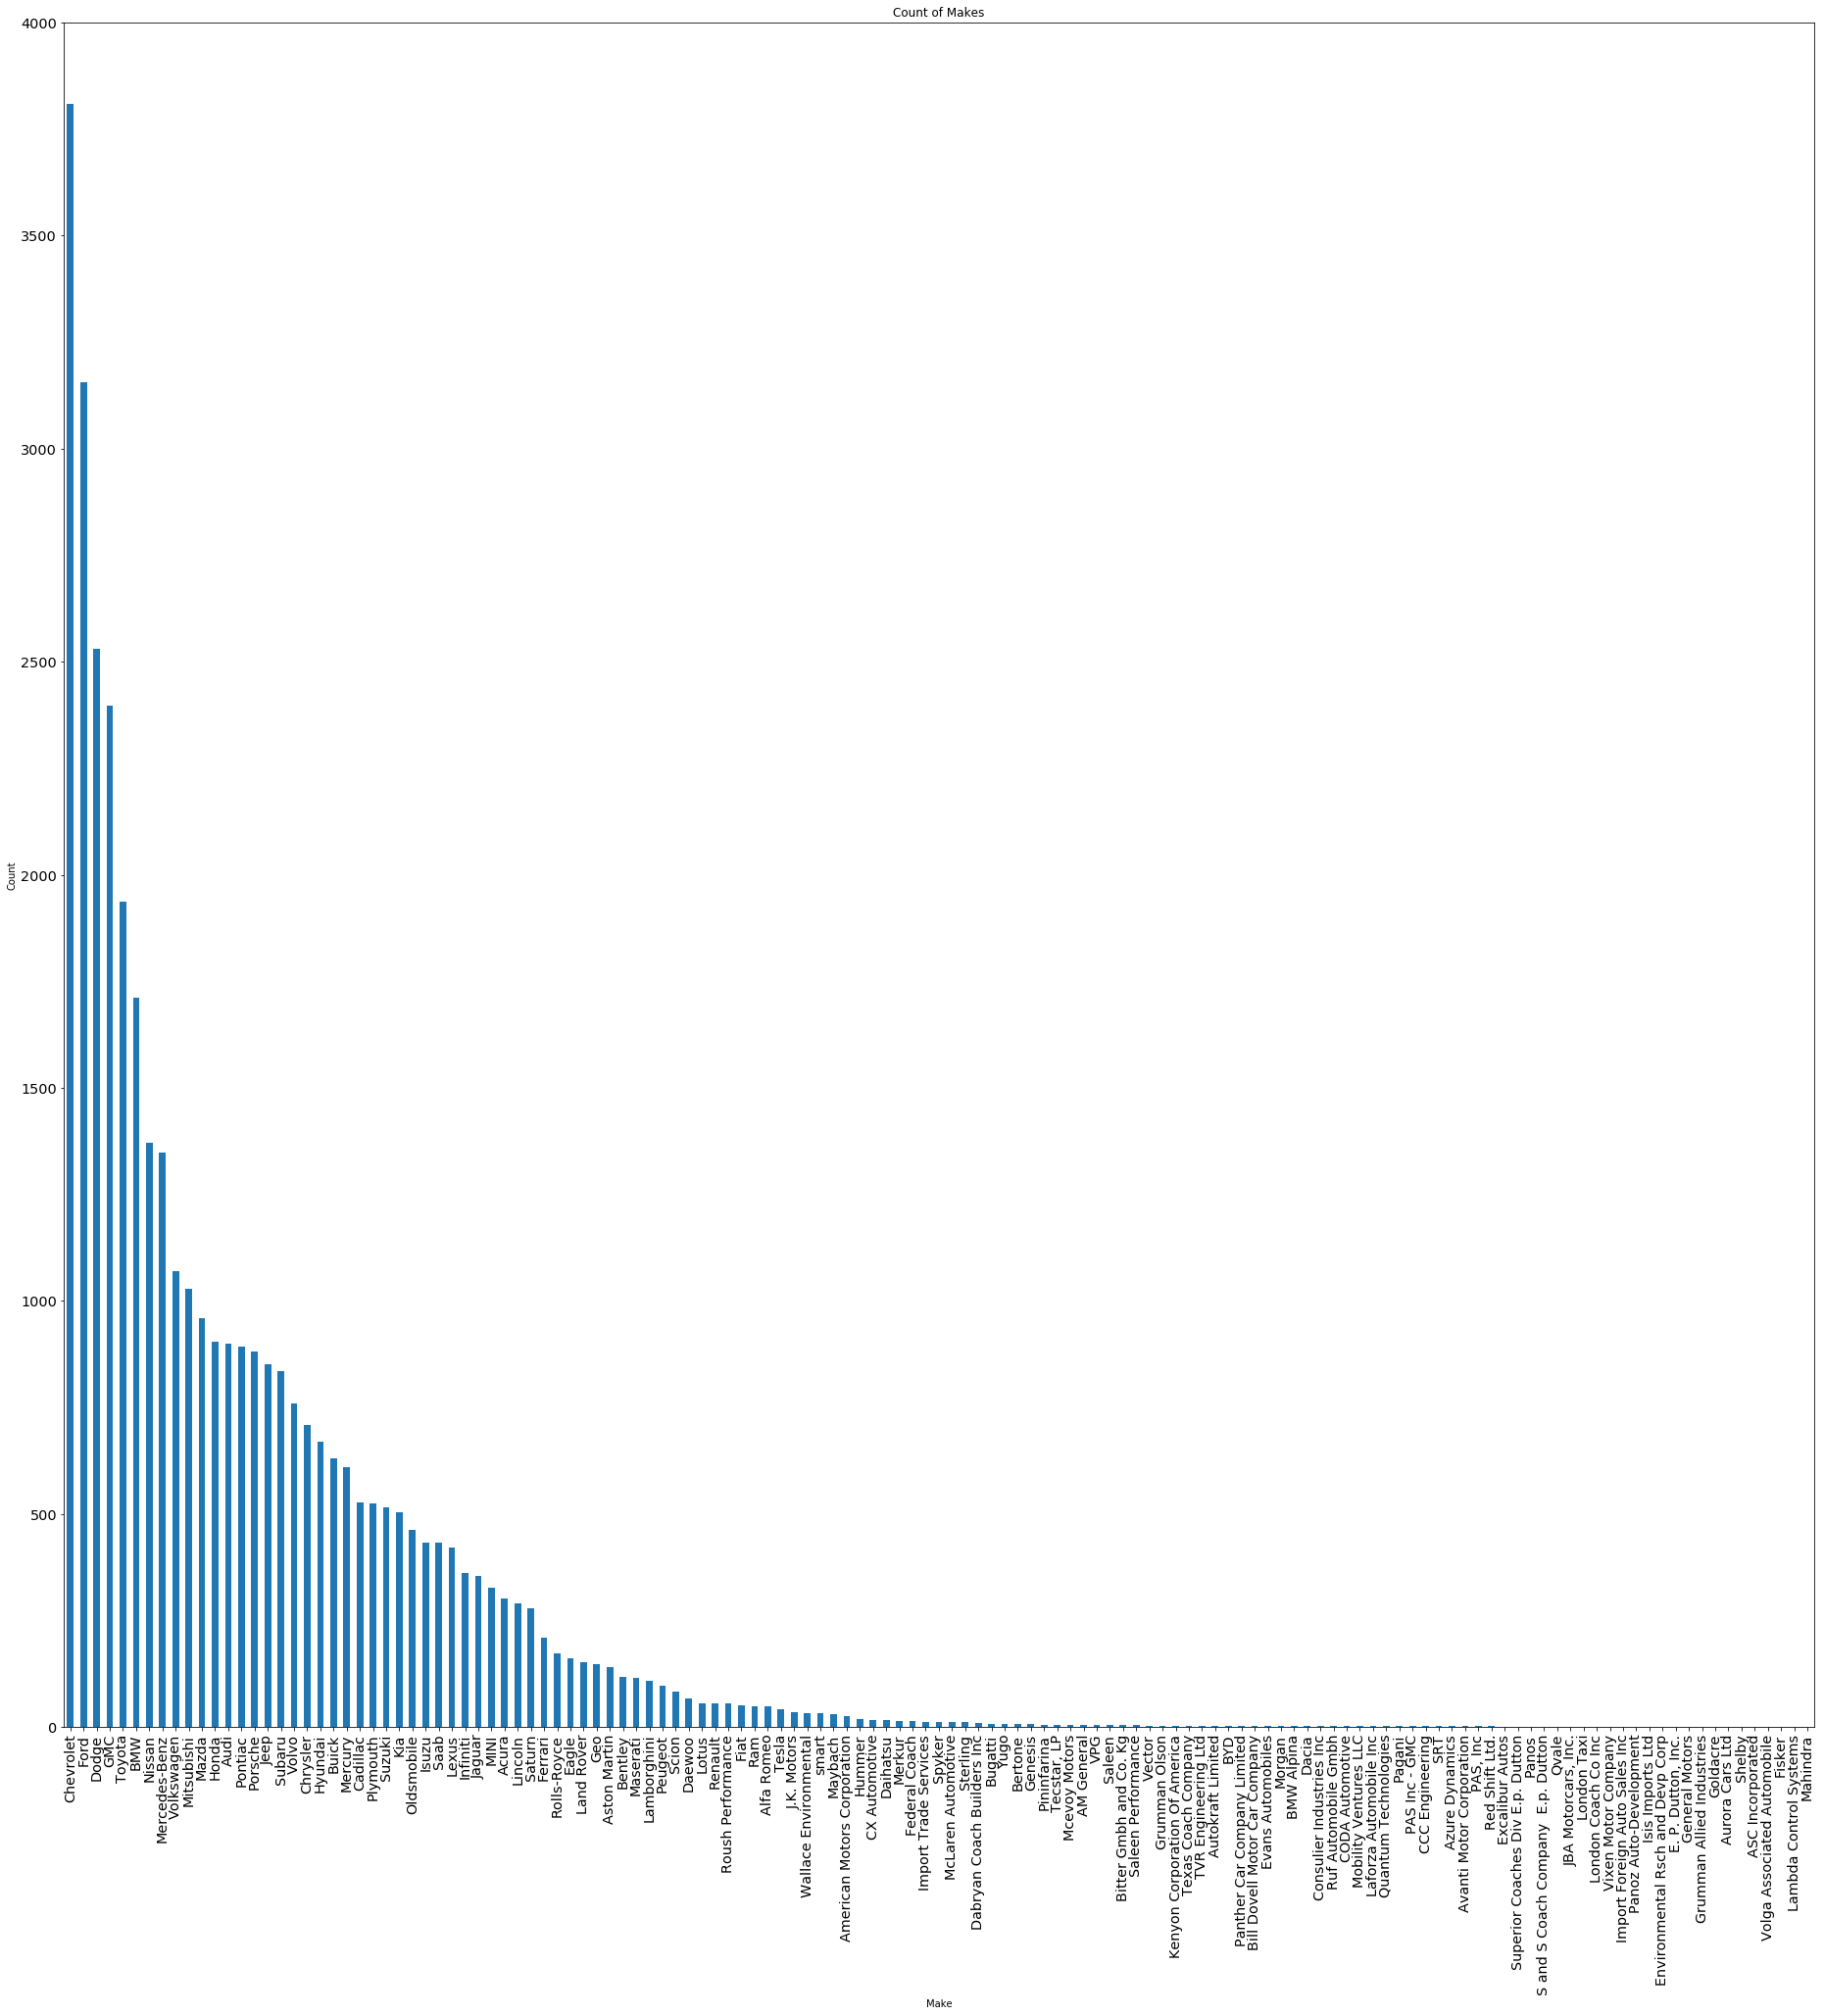

In [8]:
fuel_eco.loc[:, 'Make'].value_counts().plot(kind='bar', figsize=(32,32), fontsize='x-large');
plt.xlabel('Make');
plt.ylabel('Count');
plt.title('Count of Makes');

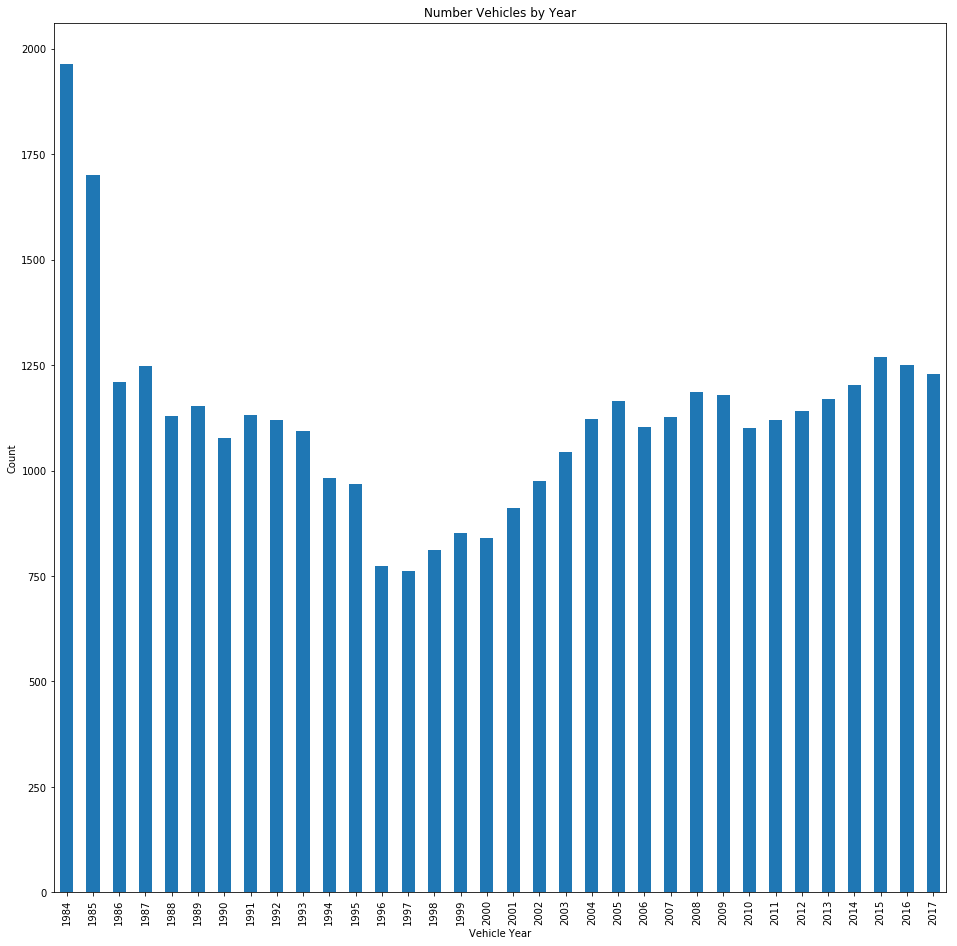

In [9]:
fuel_eco.loc[:,'Year'].value_counts().sort_index().plot(kind='bar', figsize=(16,16));
plt.xlabel('Vehicle Year');
plt.ylabel('Count');
plt.title('Number Vehicles by Year');

In [10]:
fuel_eco.groupby('Drive',as_index=False)['Combined MPG (FT1)'].mean()

,Drive,Combined MPG (FT1)
0,2-Wheel Drive,18.110454
1,4-Wheel Drive,19.158658
2,4-Wheel or All-Wheel Drive,16.747142
3,All-Wheel Drive,21.884960
4,Front-Wheel Drive,24.118118
5,Part-time 4-Wheel Drive,16.414773
6,Rear-Wheel Drive,17.759410


In [11]:
fuel_eco.sort_values(['Combined MPG (FT1)'])

,Vehicle ID,Year,Make,Model,Class,Drive,Transmission,Transmission Descriptor,Engine Index,Engine Descriptor,Engine Cylinders,Engine Displacement,Turbocharger,Supercharger,Fuel Type,Fuel Type 1,Fuel Type 2,City MPG (FT1),Unrounded City MPG (FT1),City MPG (FT2),Unrounded City MPG (FT2),City Gasoline Consumption (CD),City Electricity Consumption,City Utility Factor,Highway MPG (FT1),Unrounded Highway MPG (FT1),Highway MPG (FT2),Unrounded Highway MPG (FT2),Highway Gasoline Consumption (CD),Highway Electricity Consumption,Highway Utility Factor,Unadjusted City MPG (FT1),Unadjusted Highway MPG (FT1),Unadjusted City MPG (FT2),Unadjusted Highway MPG (FT2),Combined MPG (FT1),Unrounded Combined MPG (FT1),Combined MPG (FT2),Unrounded Combined MPG (FT2),Combined Electricity Consumption,Combined Gasoline Consumption (CD),Combined Utility Factor,Annual Fuel Cost (FT1),Annual Fuel Cost (FT2),Gas Guzzler Tax,Save or Spend (5 Year),Annual Consumption in Barrels (FT1),Annual Consumption in Barrels (FT2),Tailpipe CO2 (FT1),Tailpipe CO2 in Grams/Mile (FT1),Tailpipe CO2 (FT2),Tailpipe CO2 in Grams/Mile (FT2),Fuel Economy Score,GHG Score,GHG Score (Alt Fuel),My MPG Data,2D Passenger Volume,2D Luggage Volume,4D Passenger Volume,4D Luggage Volume,Hatchback Passenger Volume,Hatchback Luggage Volume,Start Stop Technology,Alternative Fuel/Technology,Electric Motor,Manufacturer Code,Gasoline/Electricity Blended (CD),Vehicle Charger,Alternate Charger,Hours to Charge (120V),Hours to Charge (240V),Hours to Charge (AC 240V),Composite City MPG,Composite Highway MPG,Composite Combined MPG,Range (FT1),City Range (FT1),Highway Range (FT1),Range (FT2),City Range (FT2),Highway Range (FT2)
5626,2914,1987,Lamborghini,Countach,Two Seaters,Rear-Wheel Drive,Manual 5-Speed,NaN,69101,(GUZZLER) (FFS) (MPFI),12.0,5.2,NaN,NaN,Premium,Premium Gasoline,NaN,6,0.0000,0,0.0,0.0,0.0000,0.0,10,0.0000,0,0.0,0.0,0.0000,0.0,7.0000,13.0000,0.0,0.0,7,0.0000,0,0.0,0.0000,0.0,0.0,6050,0,T,-23500,47.087143,0.0,-1,1269.571429,-1,0.0,-1,-1,-1,N,45,8,0,0,0,0,NaN,NaN,NaN,NaN,False,NaN,NaN,0,0.0,0.0,0,0,0,0,0.0000,0.0000,NaN,0.0,0.0
6810,4141,1988,Lamborghini,Countach,Two Seaters,Rear-Wheel Drive,Manual 5-Speed,NaN,69101,(GUZZLER) (FFS) (MPFI),12.0,5.2,NaN,NaN,Premium,Premium Gasoline,NaN,6,0.0000,0,0.0,0.0,0.0000,0.0,10,0.0000,0,0.0,0.0,0.0000,0.0,7.0000,13.0000,0.0,0.0,7,0.0000,0,0.0,0.0000,0.0,0.0,6050,0,T,-23500,47.087143,0.0,-1,1269.571429,-1,0.0,-1,-1,-1,N,45,8,0,0,0,0,NaN,NaN,NaN,NaN,False,NaN,NaN,0,0.0,0.0,0,0,0,0,0.0000,0.0000,NaN,0.0,0.0
4425,1711,1986,Lamborghini,Countach,Two Seaters,Rear-Wheel Drive,Manual 5-Speed,NaN,69101,(GUZZLER) (FFS) (MPFI),12.0,5.2,NaN,NaN,Premium,Premium Gasoline,NaN,6,0.0000,0,0.0,0.0,0.0000,0.0,10,0.0000,0,0.0,0.0,0.0000,0.0,7.0000,13.0000,0.0,0.0,7,0.0000,0,0.0,0.0000,0.0,0.0,6050,0,T,-23500,47.087143,0.0,-1,1269.571429,-1,0.0,-1,-1,-1,N,45,8,0,0,0,0,NaN,NaN,NaN,NaN,False,NaN,NaN,0,0.0,0.0,0,0,0,0,0.0000,0.0000,NaN,0.0,0.0
9037,6413,1990,Lamborghini,Countach,Two Seaters,Rear-Wheel Drive,Manual 5-Speed,NaN,69101,(GUZZLER) (FFS) (MPFI),12.0,5.2,NaN,NaN,Premium,Premium Gasoline,NaN,6,0.0000,0,0.0,0.0,0.0000,0.0,10,0.0000,0,0.0,0.0,0.0000,0.0,7.0000,13.0000,0.0,0.0,7,0.0000,0,0.0,0.0000,0.0,0.0,6050,0,T,-23500,47.087143,0.0,-1,1269.571429,-1,0.0,-1,-1,-1,N,0,0,0,0,0,0,NaN,NaN,NaN,NaN,False,NaN,NaN,0,0.0,0.0,0,0,0,0,0.0000,0.0000,NaN,0.0,0.0
7943,5267,1989,Lamborghini,Countach,Two Seaters,Rear-Wheel Drive,Manual 5-Speed,NaN,69101,(GUZZLER) (FFS) (MPFI),12.0,5.2,NaN,NaN,Premium,Premium Gasoline,NaN,6,0.0000,0,0.0,0.0,0.0000,0.0,10,0.0000,0,0.0,0.0,0.0000,0.0,7.0000,13.0000,0.0,0.0,7,0.0000,0,0.0,0.0000,0.0,0.0,6050,0,T,-23500,47.087143,0.0,-1,1269.571429,-1,0.0,-1,-1,-1,N,45,8,0,0,0,0,NaN,NaN,NaN,NaN,False,NaN,NaN,0,0.0,0.0,0,0,0,0,0.0000,0.0000,NaN,0.0,0.0
4720,2056,1986,Rolls-Royce,Camargue,Compact Cars,Rear-Wheel Drive,Automatic 3-Speed,NaN,44022,(FFS) (GUZZLER),8.0,6.8,NaN,NaN,Regular,Regular Gasoline,NaN,7,0.0000,0,0.0,0.0,0.0000,0.0,10,0.0000,0,0.0,0.0,0

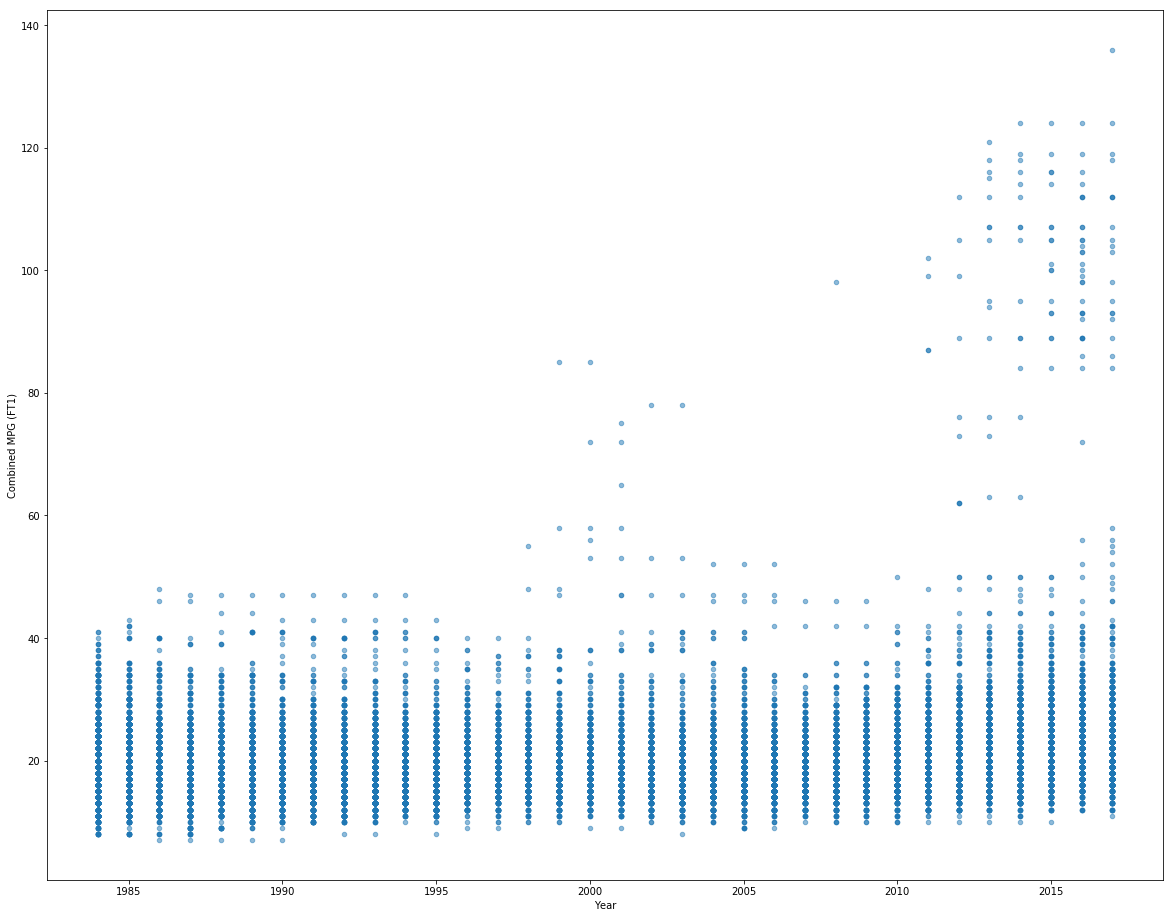

In [12]:
fuel_eco.plot(kind='scatter', x='Year', y='Combined MPG (FT1)', figsize=(20,16), alpha=.5);

In [13]:
fuel_eco.loc[:,:].isnull().sum().sort_values(ascending=False).head(18)

Alternate Charger                    38067
Vehicle Charger                      38065
Electric Motor                       37509
Supercharger                         37420
Range (FT2)                          36680
Fuel Type 2                          36675
Gas Guzzler Tax                      35817
Alternative Fuel/Technology          35066
Turbocharger                         32874
Start Stop Technology                31670
Manufacturer Code                    30794
Transmission Descriptor              23068
Engine Descriptor                    15420
Drive                                 1189
Engine Cylinders                       136
Engine Displacement                    134
Transmission                            11
Highway Gasoline Consumption (CD)        0
dtype: int64

In [14]:
x = fuel_eco.loc[:,:].isnull().sum().sort_values(ascending=False) > 0
x

Alternate Charger                       True
Vehicle Charger                         True
Electric Motor                          True
Supercharger                            True
Range (FT2)                             True
Fuel Type 2                             True
Gas Guzzler Tax                         True
Alternative Fuel/Technology             True
Turbocharger                            True
Start Stop Technology                   True
Manufacturer Code                       True
Transmission Descriptor                 True
Engine Descriptor                       True
Drive                                   True
Engine Cylinders                        True
Engine Displacement                     True
Transmission                            True
Highway Gasoline Consumption (CD)      False
Unrounded Highway MPG (FT2)            False
Highway MPG (FT2)                      False
Unrounded Highway MPG (FT1)            False
Highway MPG (FT1)                      False
Highway Ra

In [15]:
fuel_eco.groupby(['Make'])['Combined MPG (FT1)'].describe().sort_values('mean', ascending=False)

,count,mean,std,min,25%,50%,75%,max
Make,,,,,,,,
Tesla,42.0,94.452381,5.264712,86.0,89.00,93.0,98.75,104.0
CODA Automotive,2.0,73.000000,0.000000,73.0,73.00,73.0,73.00,73.0
BYD,4.0,65.000000,4.690416,62.0,62.75,63.0,65.25,72.0
Azure Dynamics,2.0,62.000000,0.000000,62.0,62.00,62.0,62.00,62.0
smart,32.0,56.656250,32.074117,34.0,36.00,36.0,92.00,107.0
Fiat,51.0,37.137255,25.850354,24.0,27.00,29.0,30.00,116.0
Daihatsu,17.0,29.647059,5.086025,20.0,27.00,32.0,34.00,34.0
Grumman Olson,4.0,28.750000,2.629956,26.0,26.75,29.0,31.00,31.0
MINI,327.0,28.379205,4.333837,22.0,27.00,28.0,29.00,98.0


In [16]:
fuel_eco.groupby(['Make'])['Combined MPG (FT2)'].describe().sort_values('mean', ascending=False)

,count,mean,std,min,25%,50%,75%,max
Make,,,,,,,,
Fisker,1.0,54.000000,NaN,54.0,54.0,54.0,54.0,54.0
Ram,49.0,4.387755,6.399272,0.0,0.0,0.0,13.0,15.0
McLaren Automotive,13.0,2.769231,6.759609,0.0,0.0,0.0,0.0,18.0
Bentley,117.0,1.940171,4.058390,0.0,0.0,0.0,0.0,11.0
Chrysler,710.0,1.632394,5.542381,0.0,0.0,0.0,0.0,84.0
Cadillac,528.0,1.339015,7.643915,0.0,0.0,0.0,0.0,85.0
Chevrolet,3810.0,1.307087,5.628723,0.0,0.0,0.0,0.0,106.0
GMC,2398.0,1.288991,3.725944,0.0,0.0,0.0,0.0,17.0
Ford,3155.0,1.256735,6.152059,0.0,0.0,0.0,0.0,97.0


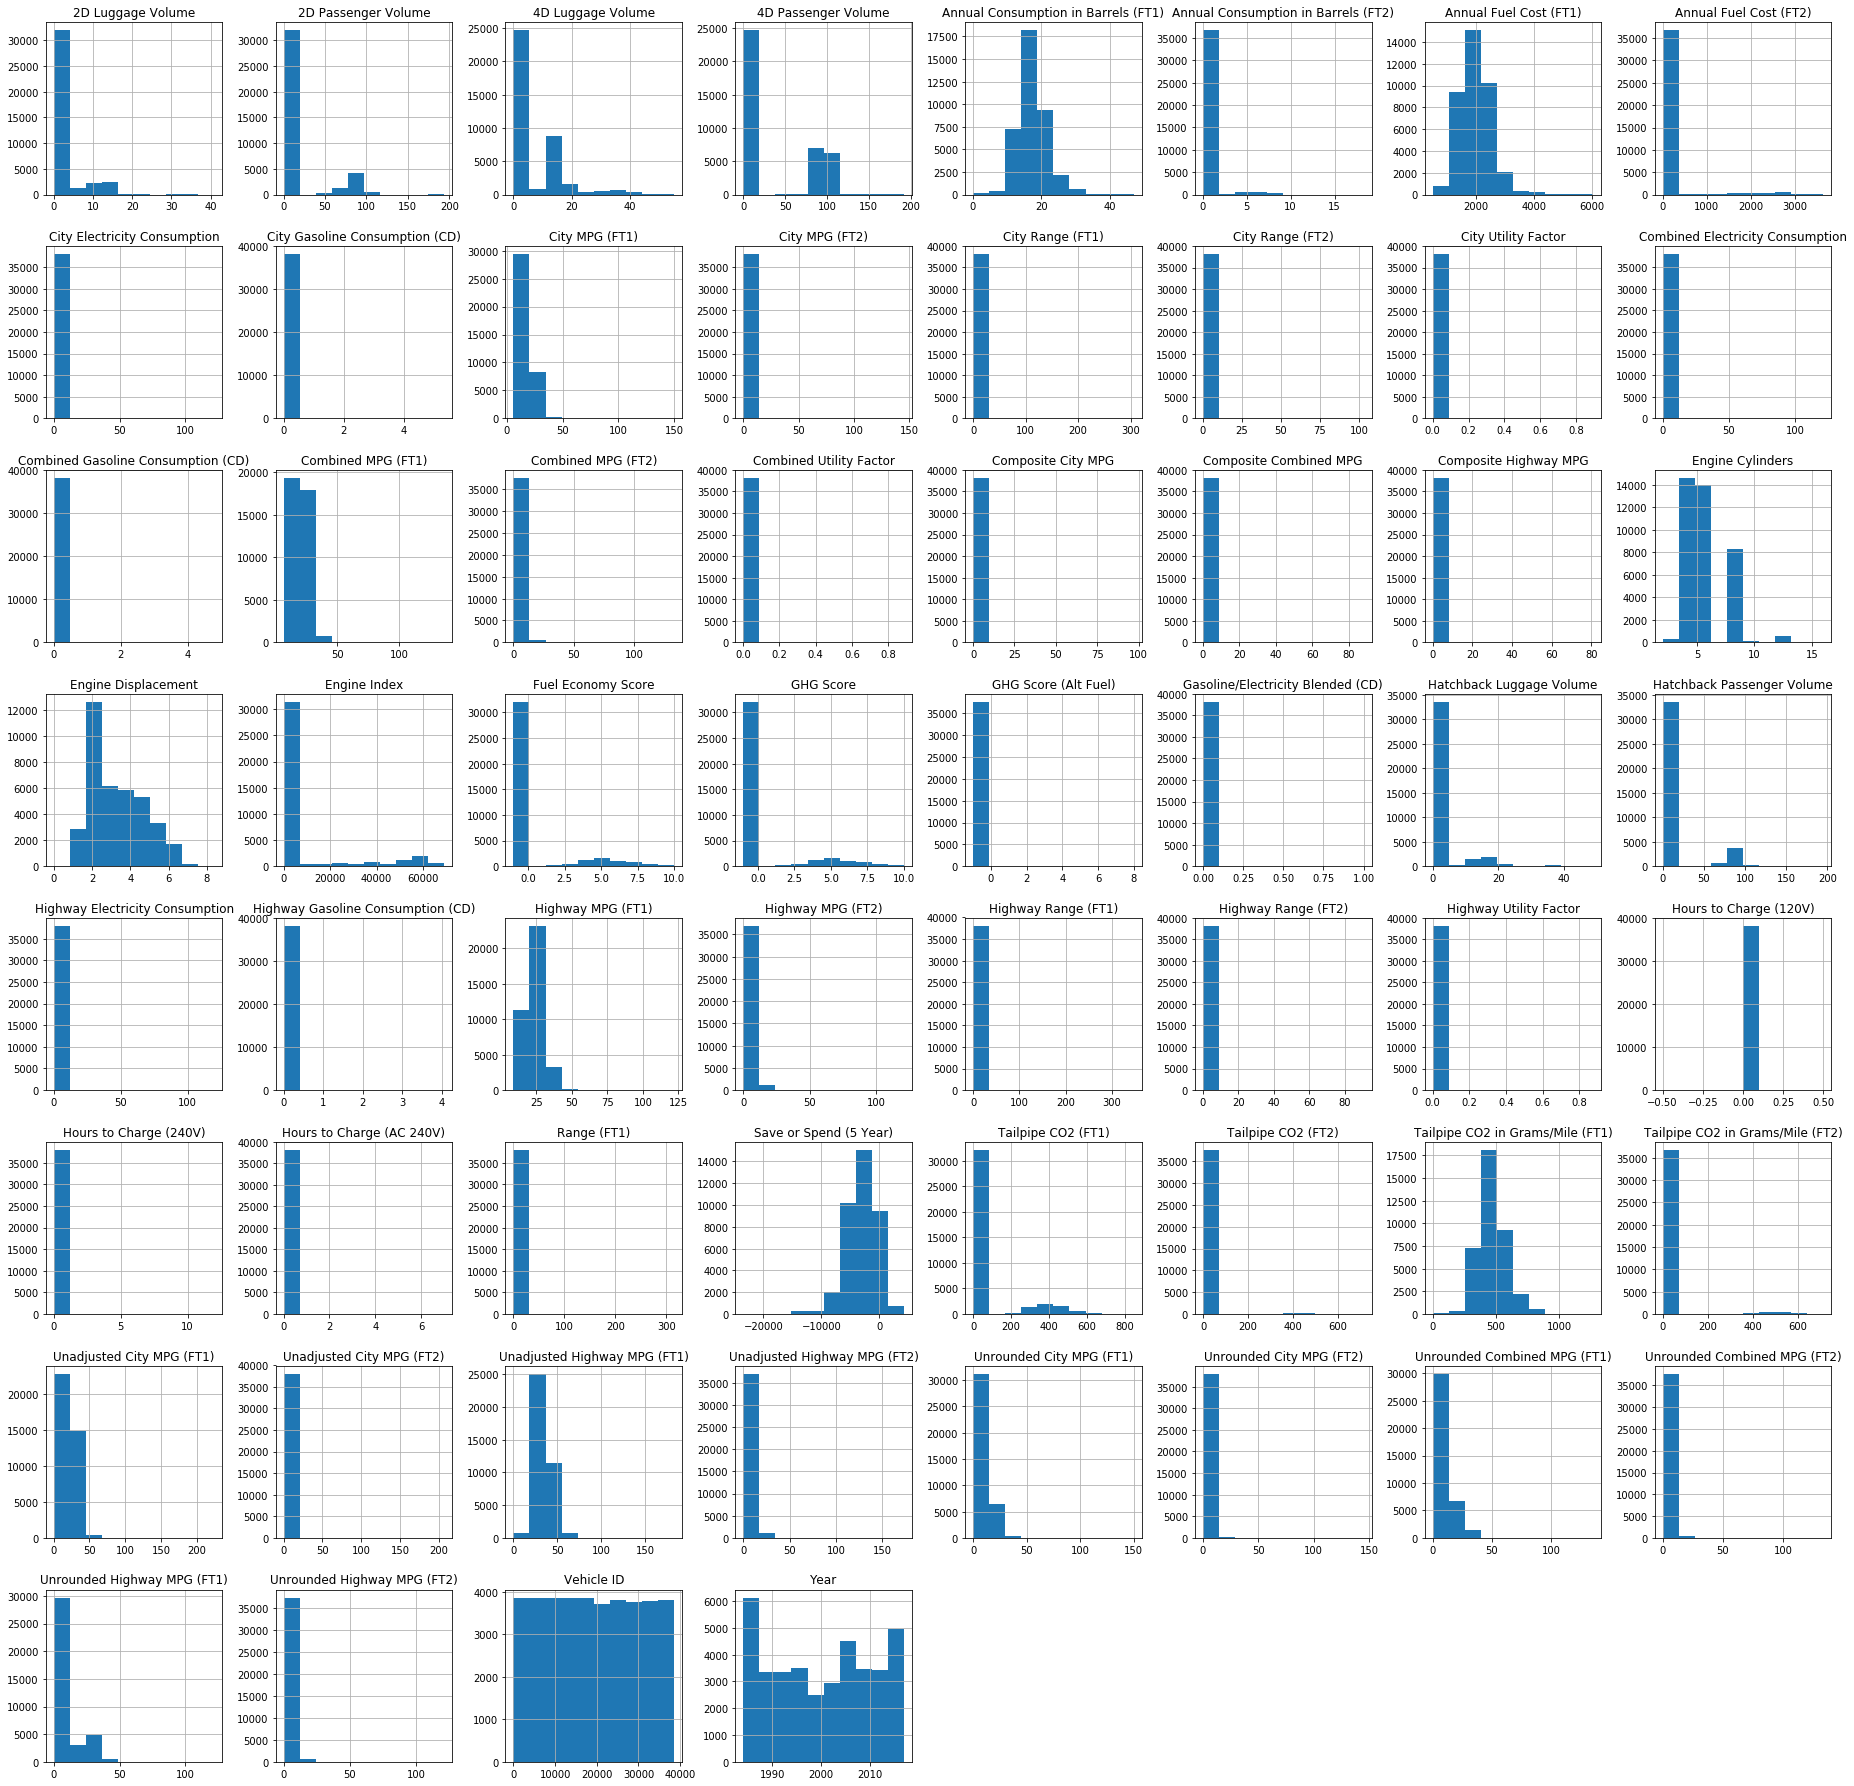

In [17]:
fuel_eco.hist(figsize=(32,32));

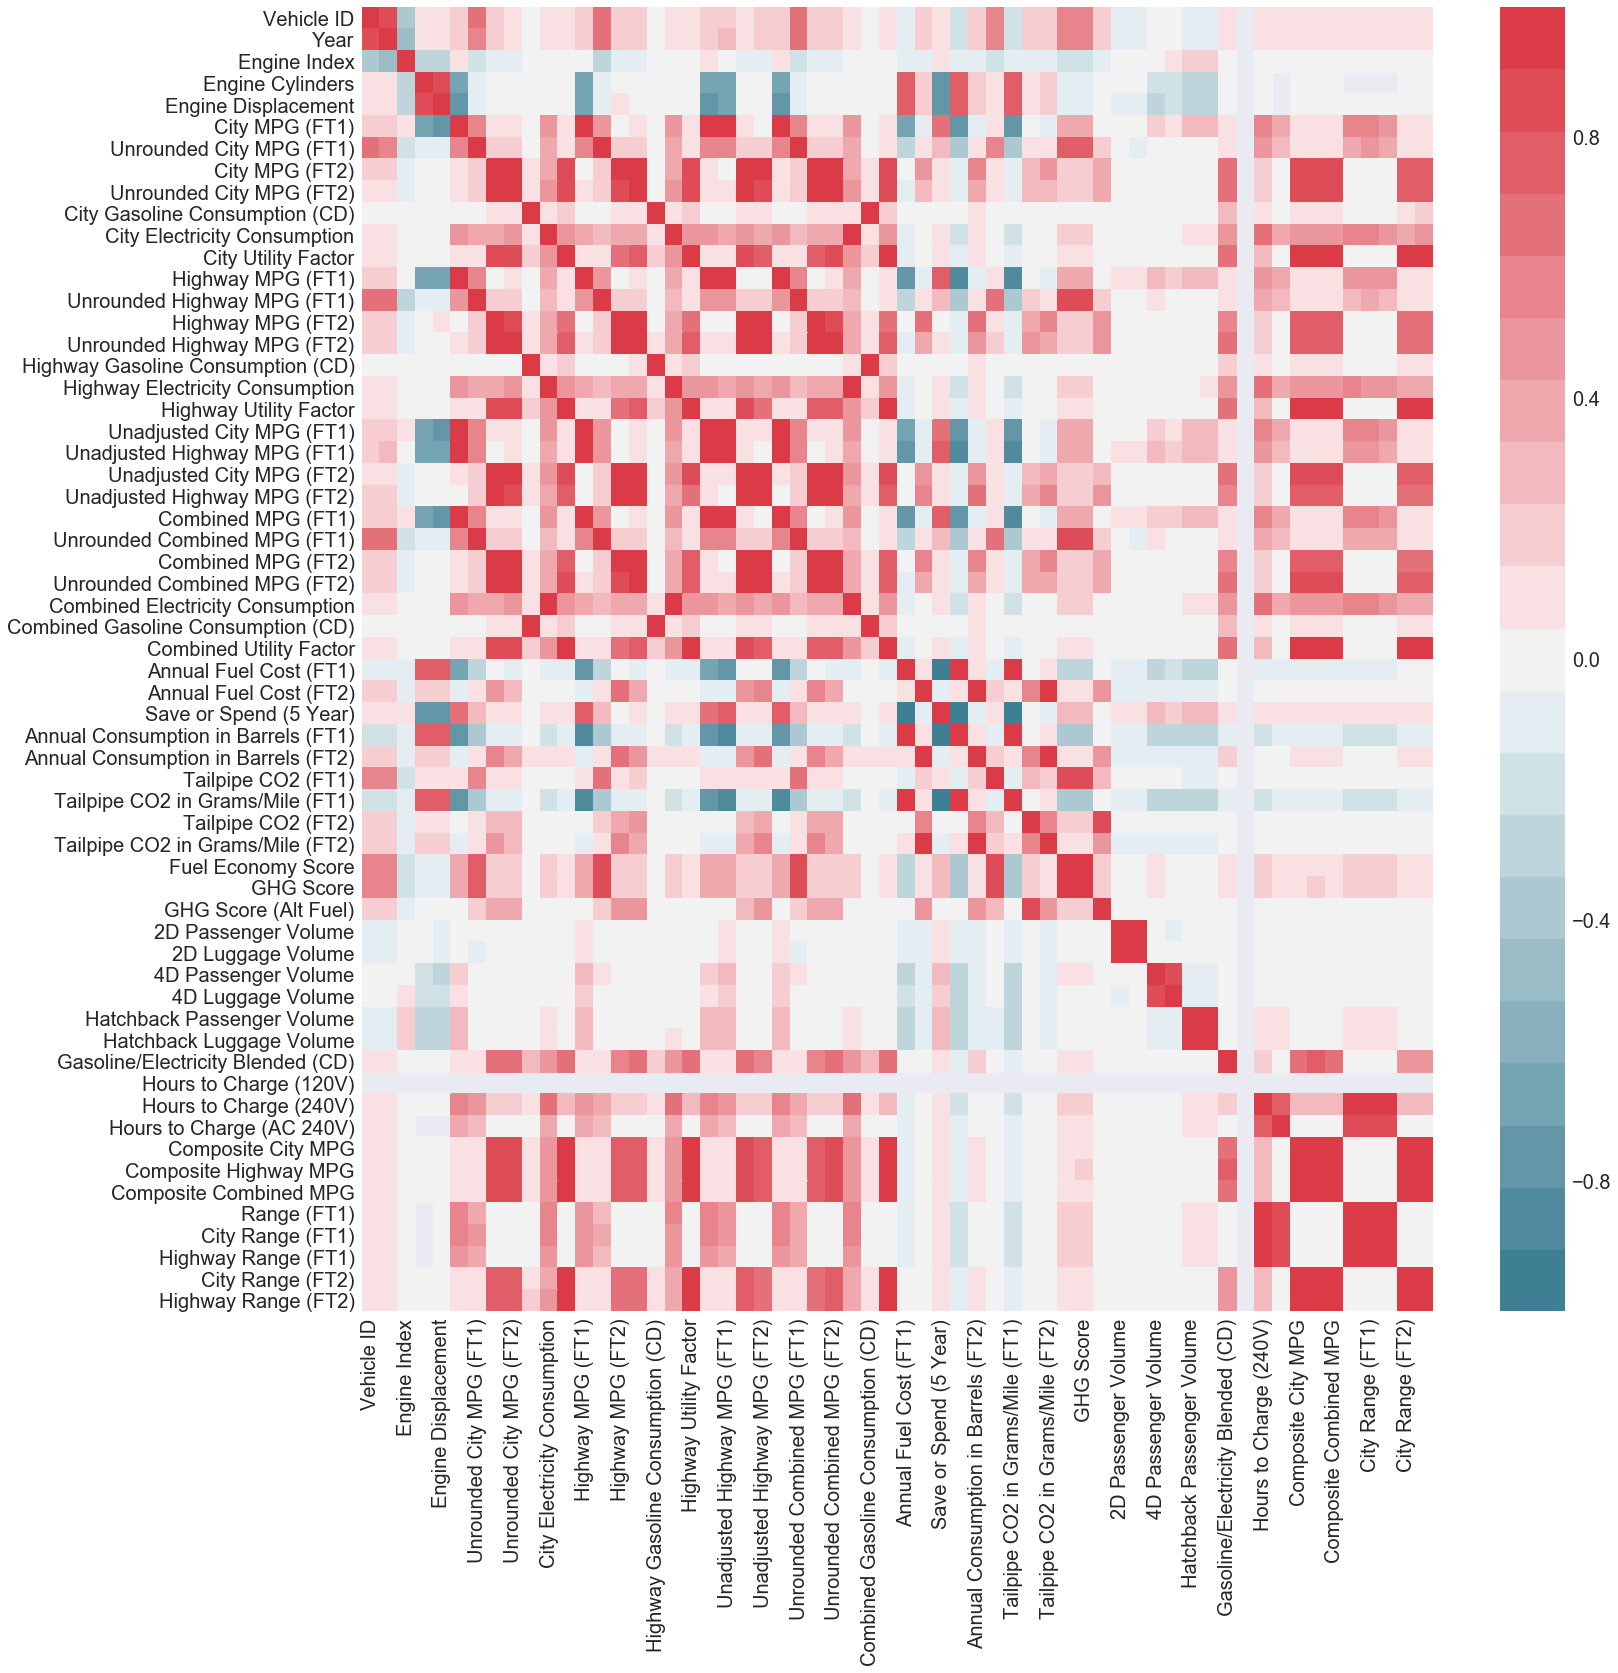

In [18]:
plt.figure(figsize=(24,24))
sns.set(font_scale=2)

sns.heatmap(fuel_eco.corr(),
           vmin=-1,
            vmax=1,
            cmap=sns.diverging_palette(220,10,n=21),       
           );

In [19]:
fuel_eco.columns

Index(['Vehicle ID', 'Year', 'Make', 'Model', 'Class', 'Drive', 'Transmission',
       'Transmission Descriptor', 'Engine Index', 'Engine Descriptor',
       'Engine Cylinders', 'Engine Displacement', 'Turbocharger',
       'Supercharger', 'Fuel Type', 'Fuel Type 1', 'Fuel Type 2',
       'City MPG (FT1)', 'Unrounded City MPG (FT1)', 'City MPG (FT2)',
       'Unrounded City MPG (FT2)', 'City Gasoline Consumption (CD)',
       'City Electricity Consumption', 'City Utility Factor',
       'Highway MPG (FT1)', 'Unrounded Highway MPG (FT1)', 'Highway MPG (FT2)',
       'Unrounded Highway MPG (FT2)', 'Highway Gasoline Consumption (CD)',
       'Highway Electricity Consumption', 'Highway Utility Factor',
       'Unadjusted City MPG (FT1)', 'Unadjusted Highway MPG (FT1)',
       'Unadjusted City MPG (FT2)', 'Unadjusted Highway MPG (FT2)',
       'Combined MPG (FT1)', 'Unrounded Combined MPG (FT1)',
       'Combined MPG (FT2)', 'Unrounded Combined MPG (FT2)',
       'Combined Electricity Consu

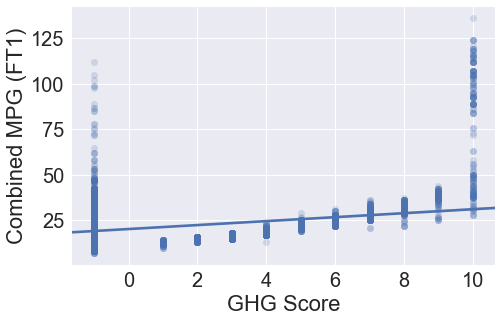

In [20]:
sns.lmplot(x='GHG Score',
           y='Combined MPG (FT1)',
           data=fuel_eco,
          aspect=1.5,
          scatter_kws={'alpha': 0.2}
          );

In [21]:
# fuel_eco.loc[:, 'transmission_dummy'] fuel_eco.loc[:, 'Transmission'].str.contains('Auto', na=False).value_counts().sum()

In [22]:
fuel_eco.loc[:, 'Transmission'].str.contains('Man', na=False).value_counts().sum()

38113

In [23]:
# create new column with dummy variables for Automatic vs. Manual transmission
# where Automatic = 1 and Manual = 0
fuel_eco.loc[:, 'transmission_type'] = np.where((fuel_eco.loc[:, 'Transmission'].str.contains('Auto', na=False)), 1, 0)

In [24]:
fuel_eco.loc[:, 'transmission_type']

0        0
1        0
2        0
3        0
4        1
5        1
6        1
7        1
8        1
9        1
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       1
18       1
19       1
20       1
21       0
22       0
23       0
24       0
25       0
26       0
27       0
28       1
29       1
        ..
38083    1
38084    0
38085    0
38086    1
38087    1
38088    1
38089    1
38090    1
38091    1
38092    1
38093    1
38094    1
38095    1
38096    1
38097    1
38098    1
38099    1
38100    1
38101    1
38102    1
38103    1
38104    1
38105    1
38106    1
38107    1
38108    1
38109    1
38110    1
38111    1
38112    1
Name: transmission_type, Length: 38113, dtype: int32

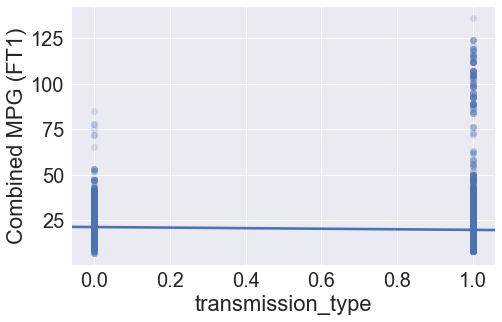

In [25]:
sns.lmplot(x='transmission_type',
           y='Combined MPG (FT1)',
           data=fuel_eco,
          aspect=1.5,
          scatter_kws={'alpha': 0.2}
          );

In [26]:
fuel_eco.loc[:, 'Fuel Type'].value_counts()

Regular                        25258
Premium                        10133
Gasoline or E85                 1223
Diesel                          1014
Electricity                      133
Premium or E85                   122
Midgrade                          77
CNG                               60
Premium and Electricity           25
Gasoline or natural gas           20
Regular Gas and Electricity       20
Premium Gas or Electricity        18
Gasoline or propane                8
Regular Gas or Electricity         2
Name: Fuel Type, dtype: int64

In [27]:
fuel_eco.groupby(['Fuel Type'])['Combined MPG (FT1)'].describe().sort_values('mean', ascending=False)

,count,mean,std,min,25%,50%,75%,max
Fuel Type,,,,,,,,
Electricity,133.0,92.593985,22.256098,28.0,84.00,95.0,107.00,136.0
Regular Gas or Electricity,2.0,42.000000,0.000000,42.0,42.00,42.0,42.00,42.0
Regular Gas and Electricity,20.0,41.800000,5.934733,32.0,38.00,39.0,47.00,54.0
Premium Gas or Electricity,18.0,31.833333,6.989488,20.0,24.00,34.0,37.00,39.0
Premium and Electricity,25.0,26.600000,5.016639,17.0,25.00,26.0,28.00,39.0
Diesel,1014.0,23.428008,6.859199,14.0,17.00,21.0,28.00,41.0
Regular,25258.0,20.167709,5.279276,8.0,16.00,20.0,23.00,58.0
Premium or E85,122.0,20.000000,3.588319,13.0,18.00,20.0,23.00,27.0
Premium,10133.0,19.345406,4.063903,7.0,17.00,19.0,21.00,44.0


In [28]:
fuel_eco.loc[:, :] #.groupby(['Make'])

,Vehicle ID,Year,Make,Model,Class,Drive,Transmission,Transmission Descriptor,Engine Index,Engine Descriptor,Engine Cylinders,Engine Displacement,Turbocharger,Supercharger,Fuel Type,Fuel Type 1,Fuel Type 2,City MPG (FT1),Unrounded City MPG (FT1),City MPG (FT2),Unrounded City MPG (FT2),City Gasoline Consumption (CD),City Electricity Consumption,City Utility Factor,Highway MPG (FT1),Unrounded Highway MPG (FT1),Highway MPG (FT2),Unrounded Highway MPG (FT2),Highway Gasoline Consumption (CD),Highway Electricity Consumption,Highway Utility Factor,Unadjusted City MPG (FT1),Unadjusted Highway MPG (FT1),Unadjusted City MPG (FT2),Unadjusted Highway MPG (FT2),Combined MPG (FT1),Unrounded Combined MPG (FT1),Combined MPG (FT2),Unrounded Combined MPG (FT2),Combined Electricity Consumption,Combined Gasoline Consumption (CD),Combined Utility Factor,Annual Fuel Cost (FT1),Annual Fuel Cost (FT2),Gas Guzzler Tax,Save or Spend (5 Year),Annual Consumption in Barrels (FT1),Annual Consumption in Barrels (FT2),Tailpipe CO2 (FT1),Tailpipe CO2 in Grams/Mile (FT1),Tailpipe CO2 (FT2),Tailpipe CO2 in Grams/Mile (FT2),Fuel Economy Score,GHG Score,GHG Score (Alt Fuel),My MPG Data,2D Passenger Volume,2D Luggage Volume,4D Passenger Volume,4D Luggage Volume,Hatchback Passenger Volume,Hatchback Luggage Volume,Start Stop Technology,Alternative Fuel/Technology,Electric Motor,Manufacturer Code,Gasoline/Electricity Blended (CD),Vehicle Charger,Alternate Charger,Hours to Charge (120V),Hours to Charge (240V),Hours to Charge (AC 240V),Composite City MPG,Composite Highway MPG,Composite Combined MPG,Range (FT1),City Range (FT1),Highway Range (FT1),Range (FT2),City Range (FT2),Highway Range (FT2),transmission_type
0,26587,1984,Alfa Romeo,GT V6 2.5,Minicompact Cars,NaN,Manual 5-Speed,NaN,9001,(FFS),6.0,2.5,NaN,NaN,Regular,Regular Gasoline,NaN,17,0.0000,0,0.0000,0.0000,0.0,0.000,24,0.0000,0,0.00,0.0000,0.0,0.00,21.0000,34.0000,0.0,0.0,20,0.0000,0,0.0000,0.0,0.0000,0.000,1750,0,NaN,-2000,16.480500,0.000000,-1,444.350000,-1,0.0,-1,-1,-1,N,74,7,0,0,0,0,NaN,NaN,NaN,NaN,False,NaN,NaN,0,0.0,0.0,0,0,0,0,0.0,0.0,NaN,0.00,0.0,0
1,27705,1984,Alfa Romeo,GT V6 2.5,Minicompact Cars,NaN,Manual 5-Speed,NaN,9005,(FFS) CA model,6.0,2.5,NaN,NaN,Regular,Regular Gasoline,NaN,17,0.0000,0,0.0000,0.0000,0.0,0.000,24,0.0000,0,0.00,0.0000,0.0,0.00,21.0000,34.0000,0.0,0.0,20,0.0000,0,0.0000,0.0,0.0000,0.000,1750,0,NaN,-2000,16.480500,0.000000,-1,444.350000,-1,0.0,-1,-1,-1,N,74,7,0,0,0,0,NaN,NaN,NaN,NaN,False,NaN,NaN,0,0.0,0.0,0,0,0,0,0.0,0.0,NaN,0.00,0.0,0
2,26561,1984,Alfa Romeo,Spider Veloce 2000,Two Seaters,NaN,Manual 5-Speed,NaN,9002,(FFS),4.0,2.0,NaN,NaN,Regular,Regular Gasoline,NaN,18,0.0000,0,0.0000,0.0000,0.0,0.000,25,0.0000,0,0.00,0.0000,0.0,0.00,23.0000,35.0000,0.0,0.0,21,0.0000,0,0.0000,0.0,0.0000,0.000,1650,0,NaN,-1500,15.695714,0.000000,-1,423.190476,-1,0.0,-1,-1,-1,N,0,0,0,0,0,0,NaN,NaN,NaN,NaN,False,NaN,NaN,0,0.0,0.0,0,0,0,0,0.0,0.0,NaN,0.00,0.0,0
3,27681,1984,Alfa Romeo,Spider Veloce 2000,Two Seaters,NaN,Manual 5-Speed,NaN,9006,(FFS) CA model,4.0,2.0,NaN,NaN,Regular,Regular Gasoline,NaN,18,0.0000,0,0.0000,0.0000,0.0,0.000,25,0.0000,0,0.00,0.0000,0.0,0.00,23.0000,35.0000,0.0,0.0,21,0.0000,0,0.0000,0.0,0.0000,0.000,1650,0,NaN,-1500,15.695714,0.000000,-1,423.190476,-1,0.0,-1,-1,-1,N,0,0,0,0,0,0,NaN,NaN,NaN,NaN,False,NaN,NaN,0,0.0,0.0,0,0,0,0,0.0,0.0,NaN,0.00,0.0,0
4,27550,1984,AM General,DJ Po Vehicle 2WD,Special Purpose Vehicle 2WD,2-Wheel Drive,Automatic 3-Speed,NaN,1830,(FFS),4.0,2.5,NaN,NaN,Regular,Regular Gasoline,NaN,18,0.0000,0,0.0000,0.0000,0.0,0.000,17,0.0000,0,0.00,0.0000,0.0,0.00,22.0000,24.0000,0.0,0.0,17,0.0000,0,0.0000,0.0,0.0000,0.000,2050,0,NaN,-3500,19.388824,0.000000,-1,522.764706,-1,0.0,-1,-1,-1,N,0,0,0,0,0,0,NaN,NaN,NaN,NaN,False,NaN,NaN,0,0.0,0.0,0,0,0,0,0.0,0.0,NaN,0.00,0.0,1
5,28426,1984,AM General,DJ Po Vehicle 2WD,Special Purpose Vehicle 2WD,2-Wheel Drive,Automatic 3-Speed,NaN,1880,(FFS) CA model,4.0,2.5,NaN,NaN,Regular,Regular Gasoline,NaN,18,0.0000,0,0.0000,0.

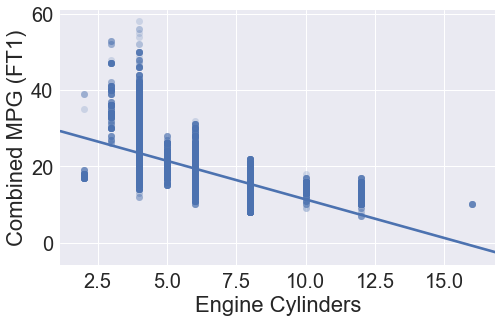

In [29]:
sns.lmplot(x='Engine Cylinders',
           y='Combined MPG (FT1)',
           data=fuel_eco,
          aspect=1.5,
          scatter_kws={'alpha': 0.2}
          );

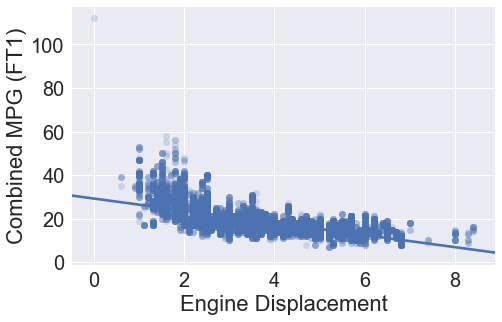

In [30]:
sns.lmplot(x='Engine Displacement',
           y='Combined MPG (FT1)',
           data=fuel_eco,
          aspect=1.5,
          scatter_kws={'alpha': 0.2}
          );

In [93]:
fuel_eco.groupby(['Class'])['Combined MPG (FT1)'].describe().sort_values('mean', ascending=False)

,count,mean,std,min,25%,50%,75%,max
Class,,,,,,,,
Small Station Wagons,1493.0,23.863362,3.813702,14.0,21.00,24.0,26.00,50.0
Small Sport Utility Vehicle 2WD,398.0,23.758794,2.798364,18.0,22.00,24.0,25.00,34.0
Compact Cars,5498.0,23.305020,4.793261,8.0,20.00,23.0,26.00,50.0
Subcompact Cars,4854.0,22.618871,5.272600,8.0,19.00,22.0,25.00,47.0
Small Sport Utility Vehicle 4WD,526.0,22.323194,3.044764,16.0,20.00,22.0,24.00,33.0
Special Purpose Vehicle,1.0,22.000000,NaN,22.0,22.00,22.0,22.00,22.0
Midsize Cars,4382.0,21.504792,5.212346,8.0,19.00,21.0,23.00,56.0
Midsize Station Wagons,522.0,20.982759,3.352269,14.0,19.00,20.0,22.00,41.0
Minicompact Cars,1253.0,20.972865,4.857151,11.0,18.00,20.0,23.00,48.0


In [32]:
len((fuel_eco.loc[fuel_eco.loc[:, 'Engine Displacement'].isnull(), :]))

134

In [33]:
len((fuel_eco.loc[fuel_eco.loc[:, 'Engine Cylinders'].isnull(), :]))

136

In [34]:
len(fuel_eco.loc[(fuel_eco.loc[:, 'Engine Displacement'].isnull()) & (fuel_eco.loc[:, 'Engine Cylinders'].isnull()), :])

# there is a strong overlap between null values for 'Engine Displacement' and 'Engine Cylinders'

134

In [35]:
# but there does not seem to be any other commonalities between the two. Dropping these values

fuel_eco.loc[(fuel_eco.loc[:, 'Engine Displacement'].isnull()) & (fuel_eco.loc[:, 'Engine Cylinders'].isnull()), :]

,Vehicle ID,Year,Make,Model,Class,Drive,Transmission,Transmission Descriptor,Engine Index,Engine Descriptor,Engine Cylinders,Engine Displacement,Turbocharger,Supercharger,Fuel Type,Fuel Type 1,Fuel Type 2,City MPG (FT1),Unrounded City MPG (FT1),City MPG (FT2),Unrounded City MPG (FT2),City Gasoline Consumption (CD),City Electricity Consumption,City Utility Factor,Highway MPG (FT1),Unrounded Highway MPG (FT1),Highway MPG (FT2),Unrounded Highway MPG (FT2),Highway Gasoline Consumption (CD),Highway Electricity Consumption,Highway Utility Factor,Unadjusted City MPG (FT1),Unadjusted Highway MPG (FT1),Unadjusted City MPG (FT2),Unadjusted Highway MPG (FT2),Combined MPG (FT1),Unrounded Combined MPG (FT1),Combined MPG (FT2),Unrounded Combined MPG (FT2),Combined Electricity Consumption,Combined Gasoline Consumption (CD),Combined Utility Factor,Annual Fuel Cost (FT1),Annual Fuel Cost (FT2),Gas Guzzler Tax,Save or Spend (5 Year),Annual Consumption in Barrels (FT1),Annual Consumption in Barrels (FT2),Tailpipe CO2 (FT1),Tailpipe CO2 in Grams/Mile (FT1),Tailpipe CO2 (FT2),Tailpipe CO2 in Grams/Mile (FT2),Fuel Economy Score,GHG Score,GHG Score (Alt Fuel),My MPG Data,2D Passenger Volume,2D Luggage Volume,4D Passenger Volume,4D Luggage Volume,Hatchback Passenger Volume,Hatchback Luggage Volume,Start Stop Technology,Alternative Fuel/Technology,Electric Motor,Manufacturer Code,Gasoline/Electricity Blended (CD),Vehicle Charger,Alternate Charger,Hours to Charge (120V),Hours to Charge (240V),Hours to Charge (AC 240V),Composite City MPG,Composite Highway MPG,Composite Combined MPG,Range (FT1),City Range (FT1),Highway Range (FT1),Range (FT2),City Range (FT2),Highway Range (FT2),transmission_type
3524,29472,1985,Subaru,RX Turbo,Subcompact Cars,4-Wheel Drive,Manual 5-Speed,NaN,0,NaN,NaN,NaN,T,NaN,Regular,Regular Gasoline,NaN,22,0.0000,0,0.0,0.0,0.0000,0.0,28,0.0000,0,0.0,0.0,0.0000,0.0,27.4000,38.8000,0.0,0.0,24,0.0000,0,0.0,0.0000,0.0,0.0,1450,0,NaN,-500,13.73375,0.0,-1,370.291667,-1,0.0,-1,-1,-1,N,0,0,0,0,0,0,NaN,NaN,NaN,NaN,False,NaN,NaN,0,0.0,0.00,0,0,0,0,0.0000,0.0000,NaN,0.0,0.0,0
3525,29473,1985,Subaru,RX Turbo,Subcompact Cars,4-Wheel Drive,Manual 5-Speed,NaN,0,CA model,NaN,NaN,T,NaN,Regular,Regular Gasoline,NaN,21,0.0000,0,0.0,0.0,0.0000,0.0,27,0.0000,0,0.0,0.0,0.0000,0.0,26.9000,37.1000,0.0,0.0,23,0.0000,0,0.0,0.0000,0.0,0.0,1500,0,NaN,-750,14.33087,0.0,-1,386.391304,-1,0.0,-1,-1,-1,N,0,0,0,0,0,0,NaN,NaN,NaN,NaN,False,NaN,NaN,0,0.0,0.00,0,0,0,0,0.0000,0.0000,NaN,0.0,0.0,0
16448,30976,1998,Chevrolet,S10 Electric,Small Pickup Trucks 2WD,2-Wheel Drive,Automatic (A1),NaN,0,Lead Acid,NaN,NaN,NaN,NaN,Electricity,Electricity,NaN,52,0.0000,0,0.0,0.0,64.0000,0.0,58,0.0000,0,0.0,0.0,59.0000,0.0,74.8889,82.1951,0.0,0.0,55,0.0000,0,0.0,62.0000,0.0,0.0,1200,0,NaN,750,0.37200,0.0,0,0.000000,-1,0.0,-1,-1,-1,N,0,0,0,0,0,0,N,EV,85 kW AC Induction,NaN,False,NaN,NaN,0,0.0,0.00,0,0,0,33,0.0000,0.0000,NaN,0.0,0.0,1
16449,30977,1998,Chevrolet,S10 Electric,Small Pickup Trucks 2WD,2-Wheel Drive,Automatic (A1),NaN,0,NiMH,NaN,NaN,NaN,NaN,Electricity,Electricity,NaN,28,0.0000,0,0.0,0.0,122.0000,0.0,28,0.0000,0,0.0,0.0,120.0000,0.0,35.8511,39.1860,0.0,0.0,28,0.0000,0,0.0,121.0000,0.0,0.0,2350,0,NaN,-5000,0.72600,0.0,0,0.000000,-1,0.0,-1,-1,-1,N,0,0,0,0,0,0,N,EV,85 kW AC Induction,NaN,False,NaN,NaN,0,0.0,0.00,0,0,0,72,0.0000,0.0000,NaN,0.0,0.0,1
16711,30975,1998,Honda,EV Plus,Compact Cars,NaN,Automatic (A1),NaN,0,NaN,NaN,NaN,NaN,NaN,Electricity,Electricity,NaN,49,0.0000,0,0.0,0.0,69.0000,0.0,46,0.0000,0,0.0,0.0,73.0000,0.0,68.7755,66.0784,0.0,0.0,48,0.0000,0,0.0,71.0000,0.0,0.0,1400,0,NaN,-250,0.42600,0.0,0,0.000000,-1,0.0,-1,-1,-1,N,0,0,0,0,0,0,N,EV,49 kW DC Brushless,NaN,False,NaN,NaN,0,0.0,0.00,0,0,0,81,0.0000,0.0000,NaN,0.0,0.0,1
17323,30973,1999,Dodge,Caravan/Grand Caravan 2WD,Minivan - 2WD,2-Wheel Drive,Automatic (A1),NaN,0,NaN,NaN,NaN,NaN,NaN,Electricity,Electricity,NaN,37,0.0000,0,0.0,0.0,90.0000,0.0,33,0.0000,0,0.0,0.0,103.0000,0.0,50.2985,46.1644,0.0,0.0,35,0.0000,

In [36]:
fuel_eco = fuel_eco.loc[fuel_eco.loc[:, 'Engine Cylinders'].notnull(), :]
len(fuel_eco)

37977

In [37]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression

In [38]:
feature_cols = ['Engine Displacement']

X = fuel_eco.loc[:, feature_cols]
y = fuel_eco.loc[:, 'Combined MPG (FT1)']

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [40]:
LR = LinearRegression() # instantiate model
LR.fit(X_train, y_train) # fit on training set
LR.predict(X_test) # use fit to make predictions
y_pred = LR.predict(X_test) # make predictions

In [41]:
y_pred

array([ 14.7392946 ,  23.60347579,  14.46228894, ...,  19.44839086,
        20.83341917,  12.24624364])

In [47]:
# check root mean squared error (RMSE) of null prediction for baselining of model
null_pred = y - np.mean(y)
null_rmse = np.sqrt(metrics.mean_squared_error(null_pred, y))
print(null_rmse)

19.9624772889


In [49]:
# RMSE of y_pred using our feature columns is very small compared to null model.
# current feature column is just Engine Displacement
# let's test with other feature columns
y_pred_rmse = np.sqrt(metrics.mean_squared_error(y_pred, y_test))
print(y_pred_rmse)

3.48999804002


In [50]:
# RMSE is lower
feature_cols = ['Engine Displacement', 'Year']

X = fuel_eco.loc[:, feature_cols]
y = fuel_eco.loc[:, 'Combined MPG (FT1)']

X_train, X_test, y_train, y_test = train_test_split(X, y)

LR = LinearRegression() # instantiate model
LR.fit(X_train, y_train) # fit on training set
LR.predict(X_test) # use fit to make predictions
y_pred = LR.predict(X_test) # make predictions

y_pred_rmse = np.sqrt(metrics.mean_squared_error(y_pred, y_test))
print(y_pred_rmse)

3.24040939984


In [89]:
# RMSE is even lower
# possible colinearity between displacement and cylinders
feature_cols = ['Engine Displacement', 'Year', 'Engine Cylinders']

X = fuel_eco.loc[:, feature_cols]
y = fuel_eco.loc[:, 'Combined MPG (FT1)']

X_train, X_test, y_train, y_test = train_test_split(X, y)

LR = LinearRegression() # instantiate model
LR.fit(X_train, y_train) # fit on training set
LR.predict(X_test) # use fit to make predictions
y_pred = LR.predict(X_test) # make predictions

y_pred_rmse = np.sqrt(metrics.mean_squared_error(y_pred, y_test))
print(y_pred_rmse)

3.09487572006


In [91]:
# RMSE is higher with addition of transmission_type
feature_cols = ['Engine Displacement', 'Year', 'Engine Cylinders', 'transmission_type']

X = fuel_eco.loc[:, feature_cols]
y = fuel_eco.loc[:, 'Combined MPG (FT1)']

X_train, X_test, y_train, y_test = train_test_split(X, y)

LR = LinearRegression() # instantiate model
LR.fit(X_train, y_train) # fit on training set
LR.predict(X_test) # use fit to make predictions
y_pred = LR.predict(X_test) # make predictions

y_pred_rmse = np.sqrt(metrics.mean_squared_error(y_pred, y_test))
print(y_pred_rmse)

3.21394663212


In [94]:
# RMSE is lower with addition of GHG Score
feature_cols = ['Engine Displacement', 'Year', 'Engine Cylinders', 'GHG Score']

X = fuel_eco.loc[:, feature_cols]
y = fuel_eco.loc[:, 'Combined MPG (FT1)']

X_train, X_test, y_train, y_test = train_test_split(X, y)

LR = LinearRegression() # instantiate model
LR.fit(X_train, y_train) # fit on training set
LR.predict(X_test) # use fit to make predictions
y_pred = LR.predict(X_test) # make predictions

y_pred_rmse = np.sqrt(metrics.mean_squared_error(y_pred, y_test))
print(y_pred_rmse)

3.01990645044


In [87]:
fuel_eco.loc[:, 'Engine Descriptor'].value_counts().sort_index()

(121)      (FFS)                      16
(122)      (FFS)                      14
(16 VALVE) (FFS)      (MPFI)           2
(16-VALVE) (FFS)                      18
(16-VALVE) (FFS)      (MPFI)           3
(16-VALVE) (FFS,TRBO)                  1
(164S)     (FFS)      (MPFI)           1
(16VALVES) (FFS)                      14
(2 VALVE)  (FFS)      (MPFI)           2
(2-VALVE)  (FFS)                      10
(20-VALVE) (FFS)                       4
(20-VALVE) (FFS,TRBO)                  4
(305)      (FFS)                      71
(307)      (FFS)                      27
(350 V8)                             120
(350 V8) (DIESEL)                     31
(350 V8) (FFS)                       411
(350 V8) (FFS)   FI                    5
(350 V8) (FFS)  (MPFI)               106
(350 V8) (FFS) CA model               30
(350 V8) (GUZZLER)  (FFS)              2
(350 V8) (GUZZLER)  (FFS,TRBO)         2
(350 V8) (GUZZLER) (POLICE) (FFS)      1
(350 V8) (POLICE)   (FFS)              9
(350 V8) POLICE 

In [57]:
fuel_eco.groupby(['Engine Descriptor'])['Combined MPG (FT1)'].describe().sort_values(['mean'], ascending=False)

,count,mean,std,min,25%,50%,75%,max
Engine Descriptor,,,,,,,,
EGR/4-VLV (FFS),2.0,41.500000,2.121320,40.0,40.75,41.5,42.25,43.0
HEV LB,2.0,41.000000,0.000000,41.0,41.00,41.0,41.00,41.0
(8-VALVE) (FFS),6.0,37.166667,0.983192,36.0,36.25,37.5,38.00,38.0
LEAN BURN,4.0,37.000000,4.690416,32.0,33.50,37.5,41.00,41.0
LEAN-BURN,4.0,37.000000,4.690416,32.0,33.50,37.5,41.00,41.0
EGR/2-VLV (FFS),2.0,37.000000,1.414214,36.0,36.50,37.0,37.50,38.0
PHEV,34.0,36.705882,9.013557,17.0,33.00,38.0,39.00,54.0
PHEV; 94 Amp-hour battery,1.0,35.000000,NaN,35.0,35.00,35.0,35.00,35.0
Hybrid,2.0,34.500000,0.707107,34.0,34.25,34.5,34.75,35.0


In [96]:
fuel_eco.loc[:, 'Make'].value_counts()

Chevrolet                             3804
Ford                                  3141
Dodge                                 2530
GMC                                   2396
Toyota                                1930
BMW                                   1706
Nissan                                1362
Mercedes-Benz                         1345
Volkswagen                            1067
Mitsubishi                            1024
Mazda                                  958
Honda                                  901
Audi                                   901
Pontiac                                893
Porsche                                881
Jeep                                   851
Subaru                                 834
Volvo                                  759
Chrysler                               710
Hyundai                                669
Buick                                  630
Mercury                                609
Cadillac                               528
Plymouth   

In [97]:
# should try a ridge regression
# bikes_dummies = pd.get_dummies(bikes, columns=['season']).drop('season_1', axis=1)